
## Step 1: Reading the data

1. Go to [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)
2. If you scroll down the page a bit, you'll see a data dictionary explaining each of the columns. Take a minute to familiarize yourself with how the csv is structured.
4. Download the `train.csv` file into this lab folder.
3. Create an iPython notebook and load the csv into pandas.


In [1]:
import pandas  as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load libraries

df = pd.read_csv('train.csv')

In [3]:
#Load data in dataframe

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Find the average age of those who survived and those who did not

df.loc[df['Survived'] == 1, 'Age'].mean()

28.343689655172415

In [5]:
df.loc[df['Survived'] == 0, 'Age'].mean()

30.62617924528302


## Step 2: Cleaning the data
1. Create a bar chart showing how many missing values are in each column
  - *Bonus* : Theres a good library for visualizing missing values called Missingno.
      - [Install Instructions](https://pypi.org/project/missingno/)
      - [Usage Documentation](https://github.com/ResidentMario/missingno)
2. Which column has the most `NaN` values? How many cells in that column are empty?
3. Delete all rows where `Embarked` is empty
4. Fill all empty cabins with **¯\\_(ツ)_/¯**

Note: `NaN`, empty, and missing are synonymous.

<AxesSubplot:>

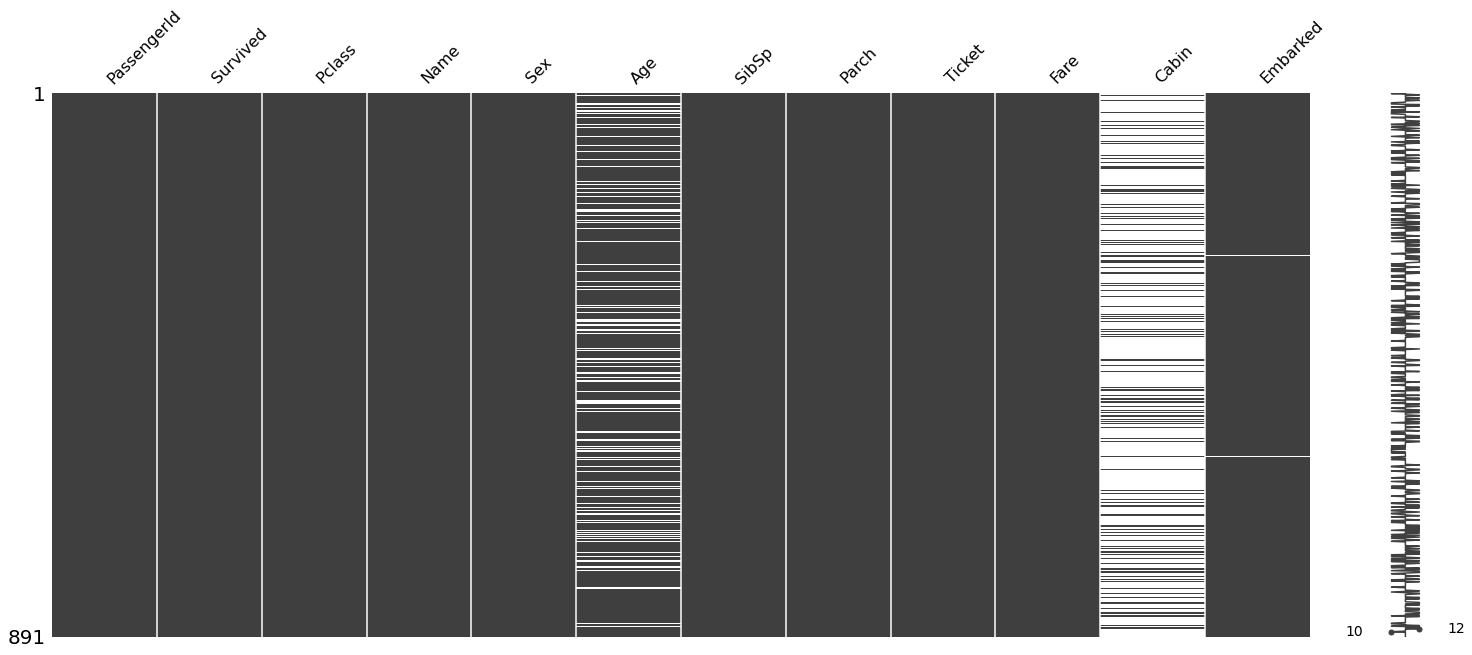

In [6]:
#Your code here 

import missingno as msno
%matplotlib inline
msno.matrix(df.sample(891))

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.loc[::].count().max()

891

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [11]:
#Your code here 
df.dropna(subset = ['Embarked'], inplace = True)

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [13]:
df[df['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [14]:
#Your code here 

df.groupby('Cabin')['Survived'].mean()

Cabin
A10    0.0
A14    0.0
A16    1.0
A19    0.0
A20    1.0
      ... 
F33    1.0
F38    0.0
F4     1.0
G6     0.5
T      0.0
Name: Survived, Length: 146, dtype: float64

In [15]:
#Your code here 

In [16]:
df['Cabin'] = df['Cabin'].map(lambda x: '¯\(ツ)/¯' if pd.isnull(x) else str(x))

## Step 3: Feature extraction
1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.
2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
  - Familiarize yourself with the [`pd.get_dummies` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS: Extract the title from everyone's name and create dummy columns

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S


In [18]:
#Your code here 

df['FamilyCount'] = df['SibSp'] + df['Parch']

In [19]:
#Your code here 

df['IsReverend'] = df['Name'].map(lambda rev: 1 if 'Rev' in rev else 0)

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0


In [21]:
df = pd.get_dummies(df, columns = ['Embarked'])

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,0,0,0,0,1


In [23]:
df = pd.get_dummies(df, columns = ['Sex'], drop_first= True)

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,1,0,0,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,0,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,¯\(ツ)/¯,0,0,0,0,1,1


In [25]:
# extract mr and mrs 

pd.get_dummies(df, columns = ['Name'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,...,"Name_Yrois, Miss. Henriette (""Mrs Harbeck"")","Name_Zabour, Miss. Hileni","Name_Zabour, Miss. Thamine","Name_Zimmerman, Mr. Leo","Name_de Messemaeker, Mrs. Guillaume Joseph (Emma)","Name_de Mulder, Mr. Theodore","Name_de Pelsmaeker, Mr. Alfons","Name_del Carlo, Mr. Sebastiano","Name_van Billiard, Mr. Austin Blyler","Name_van Melkebeke, Mr. Philemon"
0,1,0,3,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,1,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,1,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,35.0,1,0,113803,53.1000,C123,1,...,0,0,0,0,0,0,0,0,0,0
4,5,0,3,35.0,0,0,373450,8.0500,¯\(ツ)/¯,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,211536,13.0000,¯\(ツ)/¯,0,...,0,0,0,0,0,0,0,0,0,0
887,888,1,1,19.0,0,0,112053,30.0000,B42,0,...,0,0,0,0,0,0,0,0,0,0
888,889,0,3,NaN,1,2,W./C. 6607,23.4500,¯\(ツ)/¯,3,...,0,0,0,0,0,0,0,0,0,0
889,890,1,1,26.0,0,0,111369,30.0000,C148,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
test = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'],
                   'C': [1, 2, 3]})

test

,A,B,C
0,a,b,1
1,b,a,2
2,a,c,3


In [73]:
pd.get_dummies(data= test['A'], columns = 'A', prefix = 'A')

,A_a,A_b
0,1,0
1,0,1
2,1,0


In [27]:
 df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 889, dtype: object

In [28]:
df['title'] = df['Name'].map(lambda name: name.split()[1])

In [29]:
df = pd.get_dummies(df, columns = ['title'])

In [30]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'FamilyCount', 'IsReverend', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Sex_male', 'title_Billiard,',
       'title_Capt.', 'title_Carlo,', 'title_Col.', 'title_Cruyssen,',
       'title_Don.', 'title_Dr.', 'title_Gordon,', 'title_Impe,',
       'title_Jonkheer.', 'title_Major.', 'title_Master.', 'title_Melkebeke,',
       'title_Messemaeker,', 'title_Miss.', 'title_Mlle.', 'title_Mme.',
       'title_Mr.', 'title_Mrs.', 'title_Ms.', 'title_Mulder,',
       'title_Pelsmaeker,', 'title_Planke,', 'title_Rev.', 'title_Shawah,',
       'title_Steen,', 'title_Velde,', 'title_Walle,', 'title_der',
       'title_the', 'title_y'],
      dtype='object')

In [31]:
#Your code here 

In [32]:
#Your code here 

## Step 4: Exploratory analysis 
_[`df.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) may be very useful._

1. What was the survival rate overall?
2. Which gender fared the worst? What was their survival rate?
3. What was the survival rate for each `Pclass`?
4. Did any reverends survive? How many?
5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**
6. What is the survival rate for people whose `Age` is empty?
7. What is the survival rate for each port of embarkation?
8. What is the survival rate for children (under 12) in each `Pclass`?
9. Did the captain of the ship survive? Is he on the list?
10. Of all the people that died, who had the most expensive ticket? How much did it cost?
11. Does having family on the boat help or hurt your chances of survival?

In [33]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,"title_Pelsmaeker,","title_Planke,",title_Rev.,"title_Shawah,","title_Steen,","title_Velde,","title_Walle,",title_der,title_the,title_y
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,...,0,0,0,0,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,¯\(ツ)/¯,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df.groupby(by = ['Survived']).mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,FamilyCount,IsReverend,Embarked_C,Embarked_Q,...,"title_Pelsmaeker,","title_Planke,",title_Rev.,"title_Shawah,","title_Steen,","title_Velde,","title_Walle,",title_der,title_the,title_y
Survived,,,,,,,,,,,,,,,,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887,0.883424,0.010929,0.136612,0.085610,...,0.001821,0.005464,0.010929,0.001821,0.001821,0.001821,0.001821,0.001821,0.000000,0.001821
1,444.358824,1.955882,28.193299,0.476471,0.467647,48.209498,0.944118,0.000000,0.273529,0.088235,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002941,0.008824


In [35]:
# What was the survival rate overall?

df['Survived'].value_counts(normalize = True)

0    0.617548
1    0.382452
Name: Survived, dtype: float64

In [36]:
df.mean()

C:\Users\Admin\AppData\Local\Temp/ipykernel_17524/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


PassengerId           446.000000
Survived                0.382452
Pclass                  2.311586
Age                    29.642093
SibSp                   0.524184
Parch                   0.382452
Fare                   32.096681
FamilyCount             0.906637
IsReverend              0.006749
Embarked_C              0.188976
Embarked_Q              0.086614
Embarked_S              0.724409
Sex_male                0.649044
title_Billiard,         0.001125
title_Capt.             0.001125
title_Carlo,            0.001125
title_Col.              0.002250
title_Cruyssen,         0.001125
title_Don.              0.001125
title_Dr.               0.007874
title_Gordon,           0.002250
title_Impe,             0.003375
title_Jonkheer.         0.001125
title_Major.            0.002250
title_Master.           0.044994
title_Melkebeke,        0.001125
title_Messemaeker,      0.001125
title_Miss.             0.200225
title_Mlle.             0.002250
title_Mme.              0.001125
title_Mr. 

In [37]:
df.groupby(by = ['Sex_male'])['Survived'].value_counts(normalize = True)

Sex_male  Survived
0         1           0.740385
          0           0.259615
1         0           0.811092
          1           0.188908
Name: Survived, dtype: float64

In [38]:
df.groupby(by = ['Sex_male']).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilyCount,IsReverend,Embarked_C,...,"title_Pelsmaeker,","title_Planke,",title_Rev.,"title_Shawah,","title_Steen,","title_Velde,","title_Walle,",title_der,title_the,title_y
Sex_male,,,,,,,,,,,,,,,,,,,,,
0,430.932692,0.740385,2.166667,27.745174,0.698718,0.653846,44.252124,1.352564,0.000000,0.233974,...,0.000000,0.006410,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003205,0.006410
1,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.665511,0.010399,0.164645,...,0.001733,0.001733,0.010399,0.001733,0.001733,0.001733,0.001733,0.001733,0.000000,0.003466


In [39]:
# Which gender fared the worst? What was their survival rate?

df.groupby(by = ['Sex_male']).mean()['Survived']

Sex_male
0    0.740385
1    0.188908
Name: Survived, dtype: float64

In [40]:
# What was the survival rate for each Pclass?

test = df.groupby(by = ['Pclass']).mean()

test

,PassengerId,Survived,Age,SibSp,Parch,Fare,FamilyCount,IsReverend,Embarked_C,Embarked_Q,...,"title_Pelsmaeker,","title_Planke,",title_Rev.,"title_Shawah,","title_Steen,","title_Velde,","title_Walle,",title_der,title_the,title_y
Pclass,,,,,,,,,,,,,,,,,,,,,
1,461.742991,0.626168,38.105543,0.420561,0.359813,84.193516,0.780374,0.000000,0.397196,0.009346,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004673,0.004673,0.009346
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183,0.782609,0.032609,0.092391,0.016304,...,0.000000,0.00000,0.032609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010870
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550,1.008147,0.000000,0.134420,0.146640,...,0.002037,0.00611,0.000000,0.002037,0.002037,0.002037,0.002037,0.000000,0.000000,0.000000


In [41]:
# Did any reverends survive? How many?

df.groupby(by = ['IsReverend']).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilyCount,Embarked_C,Embarked_Q,...,"title_Pelsmaeker,","title_Planke,",title_Rev.,"title_Shawah,","title_Steen,","title_Velde,","title_Walle,",title_der,title_the,title_y
IsReverend,,,,,,,,,,,,,,,,,,,,,
0,445.730464,0.385051,2.313703,29.527153,0.526614,0.383918,32.190345,0.910532,0.19026,0.086070,...,0.001133,0.003398,0.0,0.001133,0.001133,0.001133,0.001133,0.001133,0.001133,0.00453
1,485.666667,0.000000,2.000000,43.166667,0.166667,0.166667,18.312500,0.333333,0.00000,0.166667,...,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [42]:
# What is the survival rate for cabins marked ¯\(ツ)/¯

df.groupby(by = ['Cabin']).mean()['Survived']

Cabin
A10        0.000000
A14        0.000000
A16        1.000000
A19        0.000000
A20        1.000000
             ...   
F38        0.000000
F4         1.000000
G6         0.500000
T          0.000000
¯\(ツ)/¯    0.299854
Name: Survived, Length: 147, dtype: float64

In [43]:
# What is the survival rate for people whose Age is empty?

df[df['Age'].isnull()]['Survived'].value_counts(normalize = True)


0    0.706215
1    0.293785
Name: Survived, dtype: float64

In [44]:
# What is the survival rate for each port of embarkation?

df.groupby('Embarked_S')['Survived'].value_counts(normalize = True)

Embarked_S  Survived
0           1           0.502041
            0           0.497959
1           0           0.663043
            1           0.336957
Name: Survived, dtype: float64

In [45]:
df.groupby('Embarked_C')['Survived'].value_counts(normalize = True)

Embarked_C  Survived
0           0           0.657420
            1           0.342580
1           1           0.553571
            0           0.446429
Name: Survived, dtype: float64

In [46]:
df.groupby('Embarked_Q')['Survived'].value_counts(normalize = True)

Embarked_Q  Survived
0           0           0.618227
            1           0.381773
1           0           0.610390
            1           0.389610
Name: Survived, dtype: float64

In [47]:
# What is the survival rate for children (under 12) in each Pclass?

age_under_12 = df[df['Age'] < 12]

age_under_12.groupby('Pclass')['Survived'].value_counts(normalize = True)

Pclass  Survived
1       1           0.750000
        0           0.250000
2       1           1.000000
3       0           0.595745
        1           0.404255
Name: Survived, dtype: float64

In [48]:
# Did the captain of the ship survive? Is he on the list?

df.groupby(by = 'title_Capt.')['Survived'].value_counts(normalize = True)

title_Capt.  Survived
0            0           0.617117
             1           0.382883
1            0           1.000000
Name: Survived, dtype: float64

In [49]:
# Of all the people that died, who had the most expensive ticket? How much did it cost?

df[df['Survived'] == 0].sort_values('Fare', ascending = False)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,"title_Pelsmaeker,","title_Planke,",title_Rev.,"title_Shawah,","title_Steen,","title_Velde,","title_Walle,",title_der,title_the,title_y
27,28,0,1,"Fortune, Mr. Charles Alexander",19.0,3,2,19950,263.0000,C23 C25 C27,...,0,0,0,0,0,0,0,0,0,0
438,439,0,1,"Fortune, Mr. Mark",64.0,1,4,19950,263.0000,C23 C25 C27,...,0,0,0,0,0,0,0,0,0,0
118,119,0,1,"Baxter, Mr. Quigg Edmond",24.0,0,1,PC 17558,247.5208,B58 B60,...,0,0,0,0,0,0,0,0,0,0
557,558,0,1,"Robbins, Mr. Victor",NaN,0,0,PC 17757,227.5250,¯\(ツ)/¯,...,0,0,0,0,0,0,0,0,0,0
527,528,0,1,"Farthing, Mr. John",NaN,0,0,PC 17483,221.7792,C95,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,180,0,3,"Leonard, Mr. Lionel",36.0,0,0,LINE,0.0000,¯\(ツ)/¯,...,0,0,0,0,0,0,0,0,0,0
815,816,0,1,"Fry, Mr. Richard",NaN,0,0,112058,0.0000,B102,...,0,0,0,0,0,0,0,0,0,0
277,278,0,2,"Parkes, Mr. Francis ""Frank""",NaN,0,0,239853,0.0000,¯\(ツ)/¯,...,0,0,0,0,0,0,0,0,0,0
466,467,0,2,"Campbell, Mr. William",NaN,0,0,239853,0.0000,¯\(ツ)/¯,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# Does having family on the boat help or hurt your chances of survival?

df['FamilyCount']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: FamilyCount, Length: 889, dtype: int64

In [51]:
df.groupby(by = 'FamilyCount')['Survived'].value_counts(normalize = True)

FamilyCount  Survived
0            0           0.699065
             1           0.300935
1            1           0.552795
             0           0.447205
2            1           0.578431
             0           0.421569
3            1           0.724138
             0           0.275862
4            0           0.800000
             1           0.200000
5            0           0.863636
             1           0.136364
6            0           0.666667
             1           0.333333
7            0           1.000000
10           0           1.000000
Name: Survived, dtype: float64

In [52]:
# from collections import defaultdict

# empty = defaultdict(list)

# for tup in enumerate df.groupby(by = 'FamilyCount')['Survived'].value_counts(normalize = True).index:
#     if tup[1] == 0:
#         empty[tup[0]] =  df.groupby(by = 'FamilyCount')['Survived'].value_counts(normalize = True).values[tup[0]]
        
# empty 

In [53]:
df.groupby(by = 'FamilyCount')['Survived'].value_counts(normalize = True)

FamilyCount  Survived
0            0           0.699065
             1           0.300935
1            1           0.552795
             0           0.447205
2            1           0.578431
             0           0.421569
3            1           0.724138
             0           0.275862
4            0           0.800000
             1           0.200000
5            0           0.863636
             1           0.136364
6            0           0.666667
             1           0.333333
7            0           1.000000
10           0           1.000000
Name: Survived, dtype: float64

In [54]:
selection = []
for key, index in enumerate (df.groupby(by = 'FamilyCount')['Survived'].value_counts(normalize = True).index):
    if index[1] == 0:
        selection.append(key)
selection



[0, 3, 5, 7, 8, 10, 12, 14, 15]

In [55]:
# for i in selection:
#     print(f'Survivale rate of people having {i} is: {dict_family[i]}')

In [56]:
a = (0, 5)


In [57]:
#Your code here 

## Step 5: Plotting
Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.


In [58]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'FamilyCount', 'IsReverend', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Sex_male', 'title_Billiard,',
       'title_Capt.', 'title_Carlo,', 'title_Col.', 'title_Cruyssen,',
       'title_Don.', 'title_Dr.', 'title_Gordon,', 'title_Impe,',
       'title_Jonkheer.', 'title_Major.', 'title_Master.', 'title_Melkebeke,',
       'title_Messemaeker,', 'title_Miss.', 'title_Mlle.', 'title_Mme.',
       'title_Mr.', 'title_Mrs.', 'title_Ms.', 'title_Mulder,',
       'title_Pelsmaeker,', 'title_Planke,', 'title_Rev.', 'title_Shawah,',
       'title_Steen,', 'title_Velde,', 'title_Walle,', 'title_der',
       'title_the', 'title_y'],
      dtype='object')

In [59]:
df_plot = df[['Survived', 'Pclass','Age', 'SibSp', 'Parch',
              'Fare', 'Cabin', 'FamilyCount', 'IsReverend', 'Embarked_C',
              'Embarked_Q', 'Embarked_S', 'Sex_male','title_Dr.']]

df_plot

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_male,title_Dr.
0,0,3,22.0,1,0,7.2500,¯\(ツ)/¯,1,0,0,0,1,1,0
1,1,1,38.0,1,0,71.2833,C85,1,0,1,0,0,0,0
2,1,3,26.0,0,0,7.9250,¯\(ツ)/¯,0,0,0,0,1,0,0
3,1,1,35.0,1,0,53.1000,C123,1,0,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,¯\(ツ)/¯,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,¯\(ツ)/¯,0,1,0,0,1,1,0
887,1,1,19.0,0,0,30.0000,B42,0,0,0,0,1,0,0
888,0,3,NaN,1,2,23.4500,¯\(ツ)/¯,3,0,0,0,1,0,0
889,1,1,26.0,0,0,30.0000,C148,0,0,1,0,0,1,0


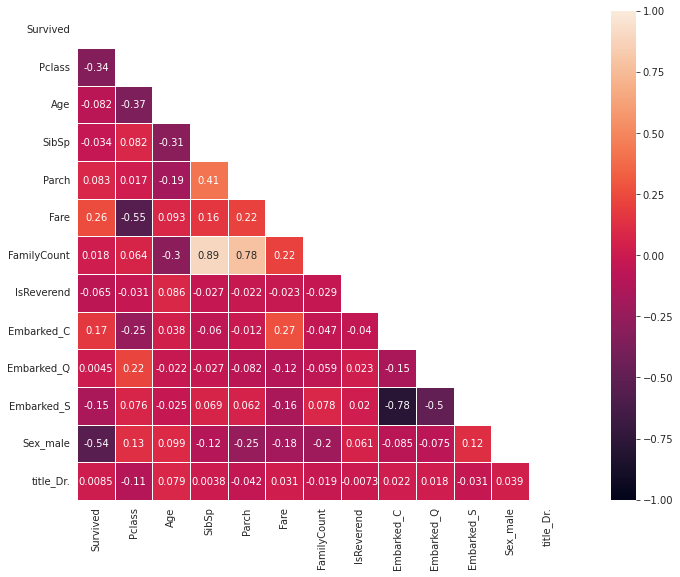

In [60]:
# Importing NumPy and Pandas.
import numpy as np
import pandas as pd

# Importing matplotlib.pyplot - the specific plotting API 
# https://matplotlib.org/api/pyplot_api.html
import matplotlib.pyplot as plt

# Import Seaborn.
import seaborn as sns

# This code is taken with minor modifications from https://seaborn.pydata.org/generated/seaborn.heatmap.html

# Establish size of figure.
plt.figure(figsize = (16,9))

# Get correlation of variables.
corr = df_plot.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5)

In [60]:
sns.pairplot(df)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Admin\AppData\Local\Temp/ipykernel_17524/4185451203.py", line 1, in <module>
    sns.pairplot(df)
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py", line 46, in inner_f
    return f(**kwargs)
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py", line 2096, in pairplot
    grid = PairGrid(data, vars=vars, x_vars=x_vars, y_vars=y_vars, hue=hue,
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py", line 46, in inner_f
    return f(**kwargs)
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py", line 1308, in __init__
    for label in ax.get_xticklabels():
  File "

TypeError: object of type 'NoneType' has no len()

Error in callback <function flush_figures at 0x000001137351DEE0> (for post_execute):



KeyboardInterrupt



In [ ]:
# Overall survival rate
plt.figure(figsize = (8, 5))


# Create a bar chart.
# plt.bar() will create a vertical bar chart.
loss = df['Survived'].value_counts(normalize = True)[0]
survive = df['Survived'].value_counts(normalize = True)[1]

plt.bar(
    ['Died', 'Survived'], # list of labels on x-axis 
    [loss, survive] # list of numbers (height on y-axis)
        
)
# Add a title and show the plot.
plt.title('Percentage who died vs those who survived');
plt.ylabel('Percentage %');


# Add a title and show the plot.
plt.title('Percentage who died vs those who survived');
plt.ylabel('Percentage %');

In [ ]:
sns.countplot(
    x = 'Survived',
    hue = "Sex_male",
    data = df_plot

)

plt.title('Percentage who died vs those who survived');
plt.xlabel('Percentage %');

In [ ]:
sns.histplot(x = 'Age', data = df, bins = 50, hue = "Sex_male")

In [ ]:
# Overall survival rate
plt.figure(figsize = (8, 5))


plt.bar(
    ['Died', 'Survived'], # list of labels on x-axis 
    [loss, survive] # list of numbers (height on y-axis)
        
)

In [ ]:
sns.countplot(
    x = 'Sex_male',
    hue = 'Survived',
    data = df_plot

)

plt.title('Percentage who died vs those who survived');
plt.xlabel('Percentage %');

In [ ]:
sns.countplot(
    x = 'Pclass',
    hue = 'Survived',
    data = df_plot

)

plt.title('Percentage who died vs those who survived');
plt.xlabel('Percentage %');

In [ ]:
df.columns

In [ ]:
df.columns

In [ ]:
sns.countplot(
    x = 'FamilyCount',
    hue = 'Survived',
    data = df_plot

)

plt.title('Percentage who died vs those who survived');
plt.xlabel('Percentage %');

In [ ]:
sns.countplot(
    x = 'IsReverend',
    hue = 'Survived',
    data = df_plot

)

plt.title('Percentage who died vs those who survived');
plt.xlabel('Percentage %');

In [ ]:
sns.scatterplot(x = "Age", y = 'Fare', data = df_plot, hue = 'title_Dr.')

In [ ]:
# Overall survival rate
plt.figure(figsize = (10, 7))

sns.histplot(data = df_plot, x = 'Survived', hue = 'Fare', bins = 100);

In [ ]:
df_plot.columns

In [ ]:
df_plot['Fare'].describe()

In [ ]:
# define function that categorises floats into 4 Categories
def categorise_fair(columns):
    if columns < 7.8:
        return '<$7.8'

    elif columns >= 7.8 and columns <= 14.45:
        return '\\$7.8-$14.45'

    elif columns >= 14.45 and columns <= 31:
        return '\\$14.45-$31'
    
    elif columns > 31:
        return '>$31'
            
    return str(col)

In [ ]:
df_plot['Fare_cat'] = df_plot['Fare'].apply(lambda x: categorise_fair(x))

In [ ]:
df_plot['Fare_cat']

In [ ]:
df_plot.columns

In [ ]:
sns.histplot(x = "Fare_cat", data = df_plot, hue = 'Survived')